## Executive Summary of EDA on Flipkart Mobile Dataset
1. Introduction
This analysis explores a dataset containing 984 mobile phone listings from Flipkart. The primary objectives include understanding pricing trends, brand comparisons, feature distributions, and identifying key factors influencing customer ratings and reviews.

2. Dataset Overview
Total Entries: 984

Total Columns: 12 (Product Name, Actual Price, Discount Price, Ratings, Reviews, RAM, Storage, Display Size, Camera, etc.)

Missing Data:

Camera information is missing for 76 entries (908 non-null values).

Other columns appear to have complete data.

3. Pricing Analysis
Price Range: The dataset includes mobile phones across various price points.

Discount Trends: Significant discounts were observed, with some products showing steep reductions between actual and discounted prices.

Brand-wise Pricing: Some brands consistently offer premium-priced devices, while others dominate budget segments.

4. Rating & Review Analysis
Star Ratings Distribution:

Most mobile phones have ratings between 3.5 and 4.5 stars.

Few devices fall below 3-star ratings, indicating a general customer satisfaction trend.

Reviews:

Devices with higher ratings tend to have more reviews, indicating a correlation between popularity and customer feedback volume.

5. Feature Comparisons
RAM & Storage Trends:

Most devices offer 4GB or 6GB RAM, with high-end models featuring 12GB+ RAM.

Storage sizes range widely, with 64GB and 128GB being the most common.

Display Size:

The majority of phones feature 6-inch to 6.8-inch screens, reflecting a market trend toward larger displays.

Camera Specifications:

Vary significantly between models, with budget phones featuring single or dual-camera setups, whereas premium devices include quad-camera setups.

6. Brand-wise Comparisons
Popular Brands: Several brands dominate different price categories, with some offering more budget-friendly options and others focusing on flagship models.

Performance vs. Price: Premium brands tend to justify higher costs with better specifications and ratings.

7. Key Insights & Recommendations
Price-to-Feature Ratio: Customers are generally willing to pay a premium for high RAM, storage, and camera quality.

Review Impact on Sales: Higher ratings correlate with more reviews, highlighting the importance of customer feedback in driving sales.

Brand Strategy: Brands targeting budget segments should focus on balancing specifications and cost-effectiveness to attract more customers.




## Introduction

Overview of the data set and objectives of the anlaysis


In [130]:
#Importing all the required library . 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [131]:
# Load Dataset in to a Pandas Data Frame. 
df = pd.read_csv(r"C:\Users\Ritik\Desktop\Mobile_dataset\Mobiles_Dataset.csv")

In [132]:
# Display First Five rows. 
df.head(5)

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-blue-...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-black...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,https://www.flipkart.com/oneplus-n20-se-jade-w...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,https://www.flipkart.com/oneplus-n20-se-blue-o...


## Basic Information About the Dataset

In [133]:
# Check dataset shape (rows, columns)
df.shape

(984, 12)

In [134]:
# Get basic details of dataset (column types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         984 non-null    object 
 1   Actual price         984 non-null    object 
 2   Discount price       984 non-null    object 
 3   Stars                984 non-null    float64
 4   Rating               984 non-null    object 
 5   Reviews              984 non-null    object 
 6   RAM (GB)             984 non-null    object 
 7   Storage (GB)         984 non-null    object 
 8   Display Size (inch)  984 non-null    float64
 9   Camera               908 non-null    object 
 10  Description          984 non-null    object 
 11  Link                 984 non-null    object 
dtypes: float64(2), object(10)
memory usage: 92.4+ KB


In [135]:
# we have to adjust the columns types ( Actual price, Discount price, Rating, Reviews, RAM (GB), Storage (GB)) to be float not strings
''' There is alot of raws in Actual price have value "NIL" 
 which is null we will replace it with teh Discount price and make a new column ( Discount Amount )
  There is  also reaws with missing actual and discount i will drop them '''

## This creates a  boolean mask , identifying rows where the "Actu price" column contains the string "NIL"

df[df['Actual price'] == "NIL"].shape

(54, 12)

In [136]:
# For the ram and storage we found that there are alot of missing valuse "NIL" we will extract teh value form discription column.

df['RAM (GB)'] .value_counts()


RAM (GB)
8        382
4        165
NIL      161
12       125
6        116
3         13
16        12
2          6
32         2
46875      2
Name: count, dtype: int64

There is also 2 raws with 46875 GB ram which is not real we will drop them

In [137]:
# There is also 2 raws with 46875 GB ram which is not real we will drop them
# we now need to make a new column (Brand name) we can extract it from Product Name column
df['Stars'].value_counts()

Stars
4.2    246
4.3    200
4.4    142
4.1    127
4.5     99
4.0     65
4.6     50
3.9     17
3.6     12
3.8     10
3.7      6
3.5      3
4.7      3
5.0      3
3.4      1
Name: count, dtype: int64

There is also 2 raws with 46875 GB ram which is not real we will drop them

In [138]:
# Stars Column are good no thing upnormal
df['Display Size (inch)'].value_counts()

Display Size (inch)
6.670    171
6.700    106
6.780    101
6.600     89
6.740     68
6.500     54
6.560     51
6.100     42
6.720     41
2.400     33
1.770     28
1.800     26
6.790     23
6.710     18
6.580     16
6.550     16
2.800     11
0.660     10
6.400     10
2.000      8
6.745      7
6.200      7
6.820      5
6.800      4
1.440      3
6.300      3
6.520      3
6.517      3
6.380      3
6.430      3
7.600      3
6.640      3
1.400      3
6.360      2
1.320      2
6.510      2
7.820      2
6.590      1
6.000      1
6.680      1
5.000      1
Name: count, dtype: int64

In [139]:
# Display Size are good no thing upnormal too
df['Camera'].value_counts()

Camera
50MP             172
50MP + 2MP       109
50MP + 8MP        82
3MP               42
8MP + 2MP         41
32MP + 2MP        31
50MP + 12MP       29
8MP               27
108MP + 2MP       26
12MP + 12MP       26
64MP + 8MP        25
50MP + 50MP       24
50MP + 5MP        20
50MP + 13MP       19
108MP             18
64MP + 2MP        16
48MP + 12MP       16
13MP              15
0MP | 0MP         14
13MP + 2MP        13
3MP + 0MP         13
8MP + 0MP         11
50MP + 10MP       11
8MP | 16MP        11
50MP | 32MP       10
2MP | 8MP          9
2MP + 2MP          8
64MP               8
8MP | 20MP         6
2MP                6
48MP + 8MP         5
13MP | 13MP        5
32MP               4
08MP | 5MP         3
108MP + 8MP        3
200MP + 50MP       3
50MP + 48MP        3
08MP | 16MP        3
2MP | 16MP         3
64MP + 13MP        2
08MP               2
16MP               2
108MP + 5MP        1
50MP + 64MP        1
5MP + 0MP          1
8MP | 8MP          1
13MP + 13MP        1
200MP 

# Cleaning

In [140]:

# Drop Unnecessary Column .
df.drop(columns=['Link'], axis=1 , inplace=True)

# Removes the 'Link' column from the dataset, as it's not needed for analysis.

In [141]:
df.head()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...


## Cheking for Missing Values

In [142]:
# Count missing values in each column. 
df.isnull().sum()

Product Name            0
Actual price            0
Discount price          0
Stars                   0
Rating                  0
Reviews                 0
RAM (GB)                0
Storage (GB)            0
Display Size (inch)     0
Camera                 76
Description             0
dtype: int64

In [143]:
# andling Missing Values in "Actual price"
df.loc[df['Actual price'] == "NIL", 'Actual price'] = df['Discount price']
df = df[df['Actual price'] != " "]


## Convert Price Columns to Numeric

In [144]:
# '''Remove  ₹  symbol and commas from 'Acutal price ' and 'Discount price' and converts them to float . 
# Drops the original columns and replaces them with cleaned versions. '''

df['Actual price(₹)'] = df['Actual price'].replace('[₹,]', '', regex=True).astype(float)
df = df.drop(columns=['Actual price'])

df['Discount price(₹)'] = df['Discount price'].replace('[₹,]', '', regex=True).astype(float)
df = df.drop(columns=['Discount price'])


In [145]:
## Calculate Discount Percentage , Create a new column 'Discount amount(%)' that calculates the percentage discount applied to each phone
df['Discount amount(%)'] = (100 - df['Discount price(₹)'] / df['Actual price(₹)'] * 100)
# Let's look the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         980 non-null    object 
 1   Stars                980 non-null    float64
 2   Rating               980 non-null    object 
 3   Reviews              980 non-null    object 
 4   RAM (GB)             980 non-null    object 
 5   Storage (GB)         980 non-null    object 
 6   Display Size (inch)  980 non-null    float64
 7   Camera               904 non-null    object 
 8   Description          980 non-null    object 
 9   Actual price(₹)      980 non-null    float64
 10  Discount price(₹)    980 non-null    float64
 11  Discount amount(%)   980 non-null    float64
dtypes: float64(5), object(7)
memory usage: 99.5+ KB


,Product Name,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Actual price(₹),Discount price(₹),Discount amount(%)
0,"Apple iPhone 15 (Green, 128 GB)",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683
1,"Apple iPhone 15 (Blue, 128 GB)",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683
2,"Apple iPhone 15 (Black, 128 GB)",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,19999.0,11489.0,42.552128
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,16999.0,12999.0,23.530796


In [146]:
## Cleanin word like "Ratings" and "Reviews" from the respective columns. 
## Converts them into numeric values and drops the original columns. 

df['Rating Numbers'] = df['Rating'].replace('[ Ratings,]', '', regex=True).astype(float)
df = df.drop(columns=['Rating'])

df['Reviews Numbers'] = df['Reviews'].replace('[ Reviews,]', '', regex=True).astype(float)
df = df.drop(columns=['Reviews'])


In [147]:
df.head()

,Product Name,Stars,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Actual price(₹),Discount price(₹),Discount amount(%),Rating Numbers,Reviews Numbers
0,"Apple iPhone 15 (Green, 128 GB)",4.6,NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0
1,"Apple iPhone 15 (Blue, 128 GB)",4.6,NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0
2,"Apple iPhone 15 (Black, 128 GB)",4.6,NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",4.0,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,19999.0,11489.0,42.552128,1005.0,41.0
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",4.0,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,16999.0,12999.0,23.530796,1005.0,41.0


In [148]:
# Extract Ram and Storage from 'Description'ArithmeticError

# This function extracts RAM and Storage from the 'Description' column using Regular Expressions(regex).
# It searches for numbers followed by "GB" or "MB" and identifies them as RAM.
# It also seaches for storage values like " 128GB Storage" and extracts them .

def extract_ram_storage(description):
    ram_match = re.search(r'(\d+)\s*(GB|MB)\s*RAM', description)
    ram = int(ram_match.group(1)) if ram_match else None

    storage_match = re.search(r'(\d+)\s*(GB|MB)\s*(?:Storage|Internal|ROM)', description)
    storage = int(storage_match.group(1)) if storage_match else None

    return ram, storage

# Create teh 'Ram' cloumn and 'Storage' column.
df['RAM (GB)'], df['Storage (GB)'] = zip(*df['Description'].apply(extract_ram_storage))

# Removes unrealistic RAM values (probably due to incorrect data extraction)

df = df[df['RAM (GB)'] != 46875.0]
df = df[df['RAM (GB)'] != 500.0]


In [149]:
df.head()

,Product Name,Stars,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Actual price(₹),Discount price(₹),Discount amount(%),Rating Numbers,Reviews Numbers
0,"Apple iPhone 15 (Green, 128 GB)",4.6,NaN,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0
1,"Apple iPhone 15 (Blue, 128 GB)",4.6,NaN,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0
2,"Apple iPhone 15 (Black, 128 GB)",4.6,NaN,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",4.0,4.0,128.0,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,19999.0,11489.0,42.552128,1005.0,41.0
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",4.0,4.0,64.0,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,16999.0,12999.0,23.530796,1005.0,41.0


In [150]:
# Extractiog Band Name

# A list of popular mobile brands. 
brand_names = ['Samsung', 'Apple', 'Xiaomi', 'Huawei', 'OnePlus', 'Oppo', 'Vivo', 
           'Realme', 'Sony', 'LG', 'Motorola', 'Nokia', 'Google', 'Asus', 'Lenovo', 
           'Infinix', 'Tecno', 'Micromax', 'HTC', 'CMF', 'Kechaoda', 'Nothing Phone', 'LAVA', 'IQOO','itel', 'POCO', 'REDMI', 'Honor', 'KARBONN']

# This fuction checks if the product name starts with any known brand name. 
def extract_brand(product_name):
    product_name_lower = product_name.lower()
    for brand in brand_names:
        if product_name_lower.startswith(brand.lower()):
            return brand
    return'Unknown'


# Applies the function to extract the brand and creates a new column 'Brand'
df['Brand'] = df['Product Name'].apply(extract_brand)




In [151]:
df.head()

,Product Name,Stars,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Actual price(₹),Discount price(₹),Discount amount(%),Rating Numbers,Reviews Numbers,Brand
0,"Apple iPhone 15 (Green, 128 GB)",4.6,NaN,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0,Apple
1,"Apple iPhone 15 (Blue, 128 GB)",4.6,NaN,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0,Apple
2,"Apple iPhone 15 (Black, 128 GB)",4.6,NaN,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0,Apple
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",4.0,4.0,128.0,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,19999.0,11489.0,42.552128,1005.0,41.0,OnePlus
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",4.0,4.0,64.0,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,16999.0,12999.0,23.530796,1005.0,41.0,OnePlus


In [165]:
## Cleaning and Extracting camer Inforamation.

## This function extracts main and secondary camera details from the 'Camera' column.
## it removes extra symbols (|), leding zeros, and "MP", then sorts the cameras.
 


# Function to clean, split, and convert the Camera column
def split_and_convert_camera(camera):
    if isinstance(camera, str):  # Ensure the entry is a string
        # Replace separators with a consistent one, such as '+'
        camera = re.sub(r'\s*\|\s*', ' + ', camera)

        # Remove leading zeros and "MP", leaving only numbers
        camera = re.sub(r'\b0*(\d+)MP\b', r'\1', camera)

        # Split multiple cameras
        cameras = camera.split(' + ')

        # Check if the list is empty before sorting
        if not cameras:
            return np.nan, np.nan

        # Sort cameras for consistency
        cameras = sorted(cameras, key=lambda x: int(x) if x.isdigit() else 0, reverse=True)

        # Convert to float and assign to Main and Second Camera
        main_camera = float(cameras[0]) if len(cameras) > 0 else np.nan
        second_camera = float(cameras[1]) if len(cameras) > 1 else np.nan

        return main_camera, second_camera

    return np.nan, np.nan  # If it's not a string, return NaN for both

# Apply the function to the 'Camera' column in the DataFrame
df['Main Camera(MP)'], df['Second Camera(MP)'] = zip(*df['Camera'].apply(split_and_convert_camera))


In [169]:
df.head()

,Product Name,Stars,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Actual price(₹),Discount price(₹),Discount amount(%),Rating Numbers,Reviews Numbers,Brand,Main Camera(MP),Second Camera(MP)
0,"Apple iPhone 15 (Green, 128 GB)",4.6,NaN,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0,Apple,48.0,12.0
1,"Apple iPhone 15 (Blue, 128 GB)",4.6,NaN,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0,Apple,48.0,12.0
2,"Apple iPhone 15 (Black, 128 GB)",4.6,NaN,128.0,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,79600.0,65999.0,17.086683,44793.0,2402.0,Apple,48.0,12.0
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",4.0,4.0,128.0,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,19999.0,11489.0,42.552128,1005.0,41.0,OnePlus,50.0,NaN
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",4.0,4.0,64.0,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,16999.0,12999.0,23.530796,1005.0,41.0,OnePlus,50.0,NaN


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 983
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         977 non-null    object 
 1   Stars                977 non-null    float64
 2   RAM (GB)             922 non-null    float64
 3   Storage (GB)         973 non-null    float64
 4   Display Size (inch)  977 non-null    float64
 5   Camera               901 non-null    object 
 6   Description          977 non-null    object 
 7   Actual price(₹)      977 non-null    float64
 8   Discount price(₹)    977 non-null    float64
 9   Discount amount(%)   977 non-null    float64
 10  Rating Numbers       977 non-null    float64
 11  Reviews Numbers      977 non-null    float64
 12  Brand                977 non-null    object 
 13  Main Camera(MP)      901 non-null    float64
 14  Second Camera (MP)   609 non-null    float64
dtypes: float64(11), object(4)
memory usage: 122.1

## EDA 
. What are the Key summary statistics
(mean,median,Standard deviation) of the numerical features lie RAM , Storage, Camera, and Price?

In [155]:
df.describe()

,Stars,RAM (GB),Storage (GB),Display Size (inch),Actual price(₹),Discount price(₹),Discount amount(%),Rating Numbers,Reviews Numbers,Main Camera(MP),Second Camera (MP)
count,977.000000,922.000000,973.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,901.000000,609.000000
mean,4.256499,9.359002,164.336074,6.055052,26562.096213,21576.586489,20.661647,23279.645855,1469.035824,41.406215,8.550082
std,0.199490,7.811165,108.944256,1.572015,24098.981446,20854.119878,10.129065,54512.086622,3026.643627,28.054497,11.111333
min,3.400000,2.000000,0.000000,0.660000,1199.000000,809.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,4.200000,6.000000,128.000000,6.500000,11999.000000,8999.000000,14.286395,670.000000,37.000000,12.000000,2.000000
50%,4.300000,8.000000,128.000000,6.670000,19999.000000,15999.000000,20.001000,5161.000000,342.000000,50.000000,5.000000
75%,4.400000,8.000000,256.000000,6.720000,32999.000000,27999.000000,27.170448,17216.000000,1414.000000,50.000000,12.000000
max,5.000000,64.000000,512.000000,7.820000,176999.000000,176999.000000,55.021162,429459.000000,23258.000000,200.000000,50.000000


Product Diversity: The Dataset includes a wide range of devices, from budget to high-end, as seen in the price, storage, 
and camera specificateions. 

Discounts: Discounts are common,and substantial discounts are applied to many devices. 
High Ratings: The overall customer ratings are high, indicating general satisfaction eith the products. 



# Peform Brand Frequency Analysis

Question: Which brands are most common in the dataset , and how do their average prices compare?


In [156]:
# Perform band Frequency Analysis
brand_counts = df['Brand'].value_counts()
print("Brand Frequency Analysis:")
print(brand_counts)

Brand Frequency Analysis:
Brand
Realme           124
Samsung          102
REDMI            102
Vivo              91
Oppo              72
Motorola          64
POCO              62
Infinix           51
itel              47
Apple             39
OnePlus           38
LAVA              31
Nokia             28
Tecno             23
IQOO              20
Kechaoda          20
Google            15
Nothing Phone     10
Unknown            9
KARBONN            9
Xiaomi             8
CMF                6
Micromax           4
Honor              2
Name: count, dtype: int64


In [157]:
# Calculate Average Price for each Brand 

average_price_per_brand = df.groupby('Brand')['Actual price(₹)'].mean().sort_values(ascending=False)
print("\nAverage Prices by Brand:")
print(average_price_per_brand)


Average Prices by Brand:
Brand
Apple            78084.615385
Xiaomi           63749.000000
Google           60599.000000
Samsung          47109.980392
OnePlus          43235.842105
Honor            39499.000000
Nothing Phone    33199.000000
Vivo             28888.813187
Oppo             25304.555556
Realme           24297.387097
IQOO             22699.050000
Motorola         21555.437500
REDMI            21381.352941
CMF              20999.000000
POCO             20700.612903
Tecno            16672.913043
Infinix          15979.392157
Micromax          5420.500000
itel              4734.340426
LAVA              4294.806452
Nokia             3569.964286
Unknown           2276.777778
Kechaoda          1562.850000
KARBONN           1412.222222
Name: Actual price(₹), dtype: float64


C:\Users\Ritik\AppData\Local\Temp\ipykernel_12164\2094681394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


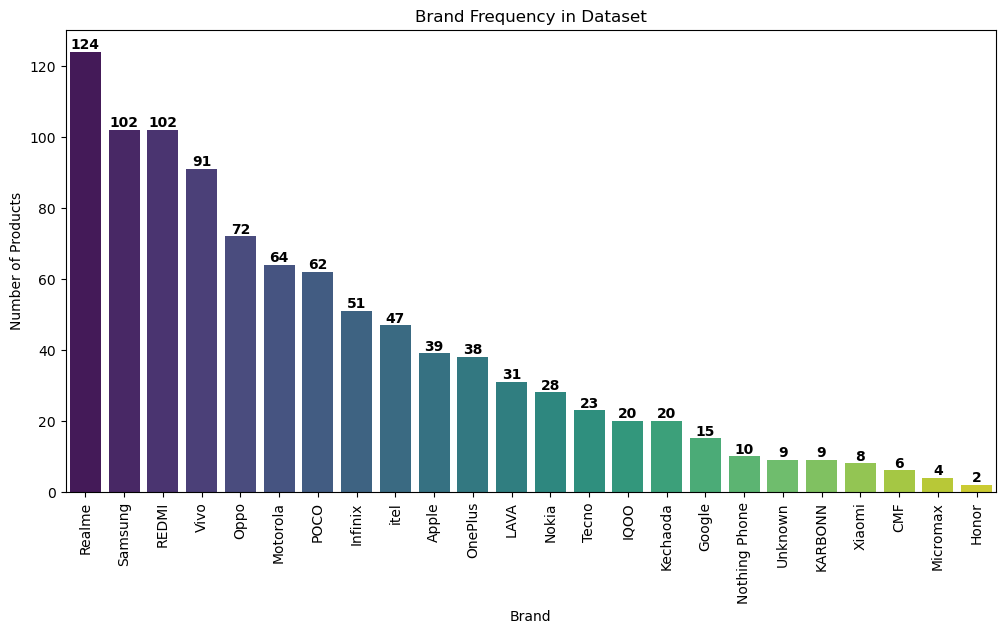

In [158]:
#Plotting Brand Frequency
plt.figure(figsize=(12,6))
ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')

plt.title('Brand Frequency in Dataset')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)

# Add integer labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert to integer
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()


C:\Users\Ritik\AppData\Local\Temp\ipykernel_12164\1183182662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_per_brand.index, y=average_price_per_brand.values, palette='magma')


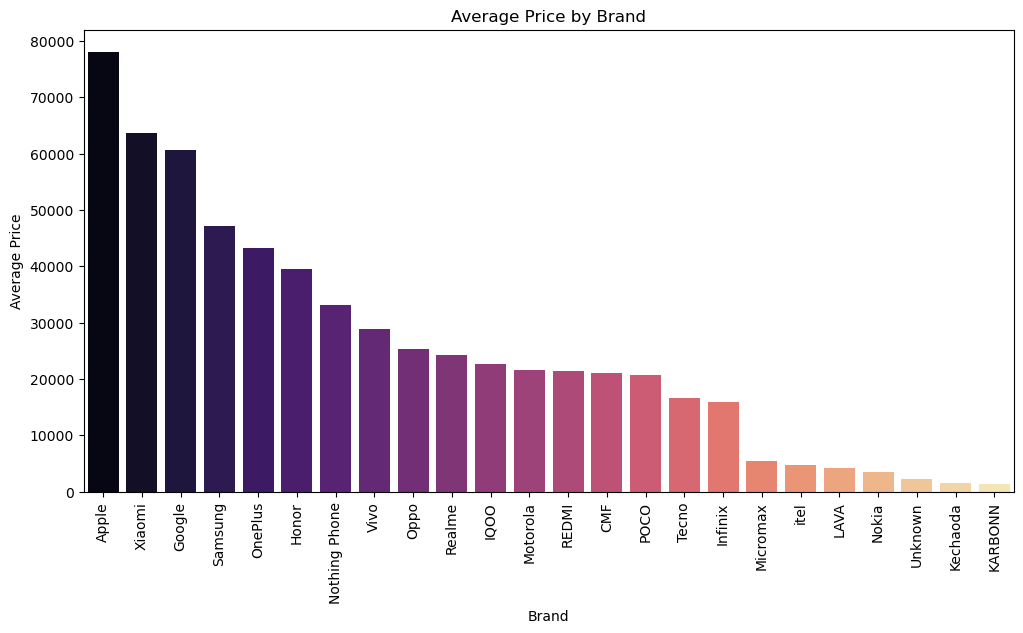

In [159]:
# Plotting Average Prices by Brand
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_per_brand.index, y=average_price_per_brand.values, palette='magma')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 983
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         977 non-null    object 
 1   Stars                977 non-null    float64
 2   RAM (GB)             922 non-null    float64
 3   Storage (GB)         973 non-null    float64
 4   Display Size (inch)  977 non-null    float64
 5   Camera               901 non-null    object 
 6   Description          977 non-null    object 
 7   Actual price(₹)      977 non-null    float64
 8   Discount price(₹)    977 non-null    float64
 9   Discount amount(%)   977 non-null    float64
 10  Rating Numbers       977 non-null    float64
 11  Reviews Numbers      977 non-null    float64
 12  Brand                977 non-null    object 
 13  Main Camera(MP)      901 non-null    float64
 14  Second Camera (MP)   609 non-null    float64
dtypes: float64(11), object(4)
memory usage: 122.1

In [170]:
# Convert the RAM and Storage columns to numeric (assuming you've already cleaned them)
df['RAM (GB)'] = pd.to_numeric(df['RAM (GB)'], errors='coerce')
df['Storage (GB)'] = pd.to_numeric(df['Storage (GB)'], errors='coerce')

# Ensure the Camera columns are also numeric
df['Main Camera(MP)'] = pd.to_numeric(df['Main Camera(MP)'], errors='coerce')
df['Second Camera (MP)'] = pd.to_numeric(df['Second Camera(MP)'], errors='coerce') 

In [171]:
# Correlation Analysis
correlation_matrix = df[['Actual price(₹)', 'RAM (GB)', 'Storage (GB)', 'Main Camera(MP)', 'Second Camera(MP)']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Actual price(₹)  RAM (GB)  Storage (GB)  Main Camera(MP)  \
Actual price(₹)           1.000000 -0.068297      0.550562         0.275100   
RAM (GB)                 -0.068297  1.000000     -0.032955        -0.269968   
Storage (GB)              0.550562 -0.032955      1.000000         0.243616   
Main Camera(MP)           0.275100 -0.269968      0.243616         1.000000   
Second Camera(MP)         0.416615 -0.017228      0.284963         0.167387   

                   Second Camera(MP)  
Actual price(₹)             0.416615  
RAM (GB)                   -0.017228  
Storage (GB)                0.284963  
Main Camera(MP)             0.167387  
Second Camera(MP)           1.000000  


Text(0, 0.5, 'Price')

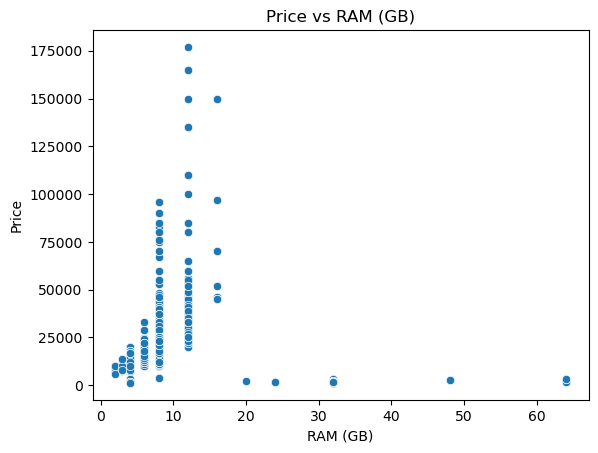

In [172]:
# Price vs RAM
sns.scatterplot(x=df['RAM (GB)'], y=df['Actual price(₹)'])
plt.title('Price vs RAM (GB)')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

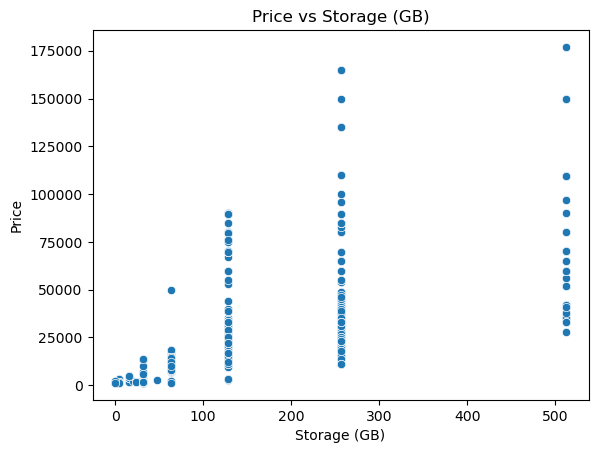

In [173]:
# Price vs Storage
sns.scatterplot(x=df['Storage (GB)'], y=df['Actual price(₹)'])
plt.title('Price vs Storage (GB)')
plt.xlabel('Storage (GB)')
plt.ylabel('Price')

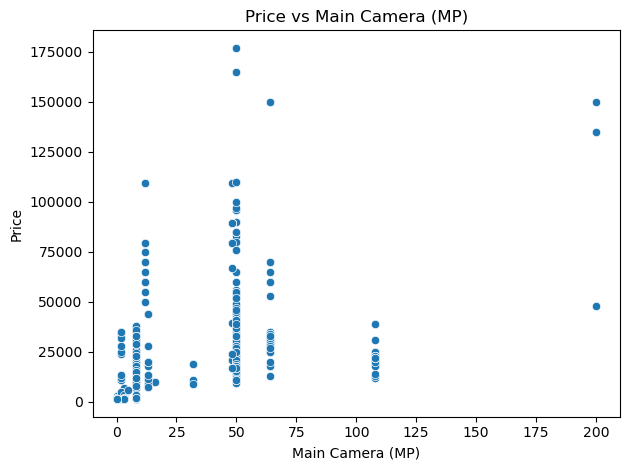

In [174]:
# Price vs Main Camera
sns.scatterplot(x=df['Main Camera(MP)'], y=df['Actual price(₹)'])
plt.title('Price vs Main Camera (MP)')
plt.xlabel('Main Camera (MP)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

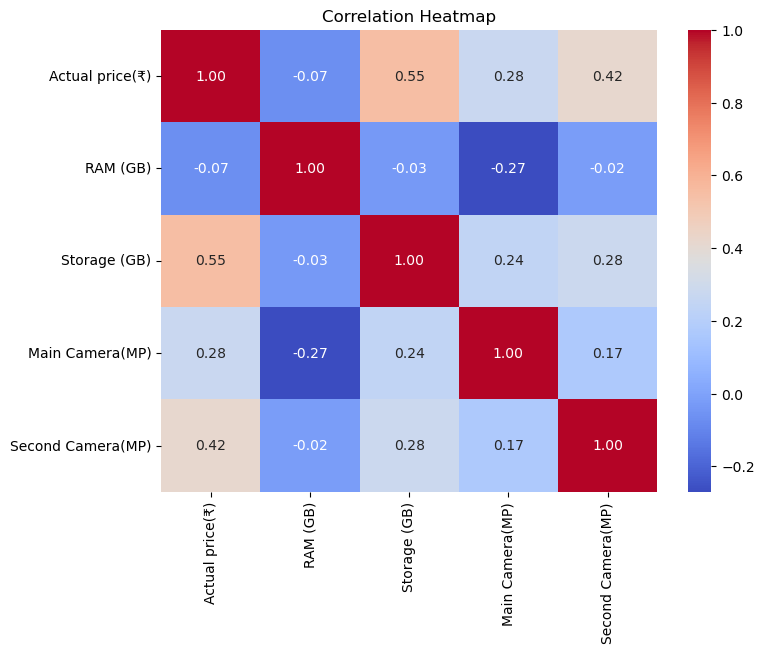

In [175]:
# Optional: Heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [176]:
# 1. Analyze the distribution of Main Camera resolutions
main_camera_counts = df['Main Camera(MP)'].value_counts().sort_index()
print("Main Camera Resolution Distribution:")
print(main_camera_counts)

# 2. Analyze the distribution of Second Camera resolutions
second_camera_counts = df['Second Camera(MP)'].value_counts().sort_index()
print("\nSecond Camera Resolution Distribution:")
print(second_camera_counts)

Main Camera Resolution Distribution:
Main Camera(MP)
0.0       14
2.0       26
3.0       53
5.0        1
8.0      106
12.0      26
13.0      33
16.0       2
32.0      35
48.0      23
50.0     479
64.0      52
108.0     46
200.0      5
Name: count, dtype: int64

Second Camera Resolution Distribution:
Second Camera(MP)
0.0      38
2.0     245
5.0      26
8.0     126
10.0     12
12.0     71
13.0     27
16.0     17
20.0      6
32.0     10
48.0      3
50.0     28
Name: count, dtype: int64


In [177]:
# 3. Find the average price based on Main Camera resolution
avg_price_by_main_camera = df.groupby('Main Camera(MP)')['Actual price(₹)'].mean().sort_index()
print("\nAverage Price by Main Camera Resolution:")
print(avg_price_by_main_camera)

# 4. Find the average price based on Second Camera resolution
avg_price_by_second_camera = df.groupby('Second Camera(MP)')['Actual price(₹)'].mean().sort_index()
print("\nAverage Price by Second Camera Resolution:")
print(avg_price_by_second_camera)


Average Price by Main Camera Resolution:
Main Camera(MP)
0.0        1655.214286
2.0       17646.384615
3.0        2090.037736
5.0        5999.000000
8.0       19768.811321
12.0      71796.038462
13.0      17938.393939
16.0       9999.000000
32.0      17970.428571
48.0      69873.608696
50.0      30166.630480
64.0      37691.307692
108.0     21542.478261
200.0    120599.000000
Name: Actual price(₹), dtype: float64

Average Price by Second Camera Resolution:
Second Camera(MP)
0.0      1712.789474
2.0     22304.048980
5.0     20374.192308
8.0     29760.904762
10.0    96165.666667
12.0    77398.140845
13.0    35147.148148
16.0    21116.647059
20.0    35999.000000
32.0    33199.000000
48.0    84993.000000
50.0    55426.285714
Name: Actual price(₹), dtype: float64


C:\Users\Ritik\AppData\Local\Temp\ipykernel_12164\3253067624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_camera_counts.index, y=main_camera_counts.values, palette='viridis')


Text(0, 0.5, 'Count')

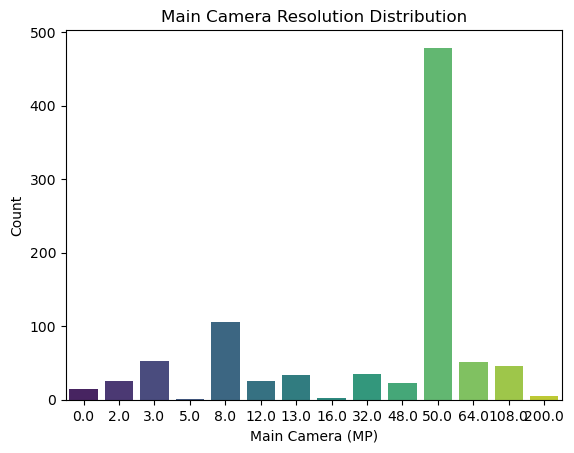

In [178]:
# Plotting the distributions and their impact on price

sns.barplot(x=main_camera_counts.index, y=main_camera_counts.values, palette='viridis')
plt.title('Main Camera Resolution Distribution')
plt.xlabel('Main Camera (MP)')
plt.ylabel('Count')

C:\Users\Ritik\AppData\Local\Temp\ipykernel_12164\3756166949.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=second_camera_counts.index, y=second_camera_counts.values, palette='viridis')


Text(0, 0.5, 'Count')

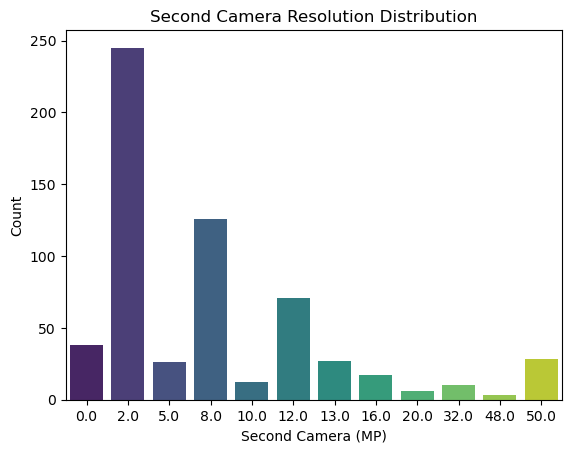

In [179]:
sns.barplot(x=second_camera_counts.index, y=second_camera_counts.values, palette='viridis')
plt.title('Second Camera Resolution Distribution')
plt.xlabel('Second Camera (MP)')
plt.ylabel('Count')

Text(0, 0.5, 'Average Price')

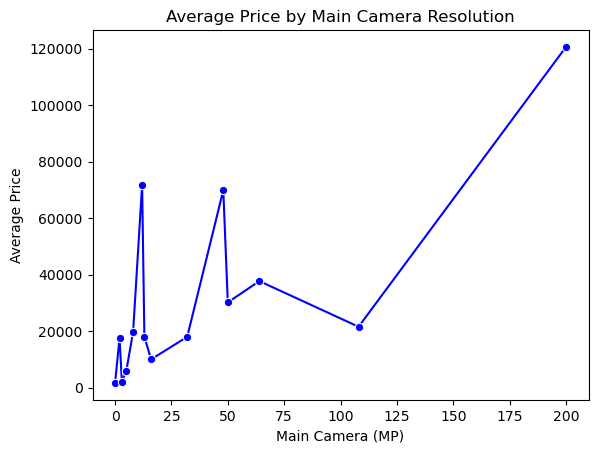

In [180]:
# Average Price by Main Camera Resolution
sns.lineplot(x=avg_price_by_main_camera.index, y=avg_price_by_main_camera.values, marker='o', color='b')
plt.title('Average Price by Main Camera Resolution')
plt.xlabel('Main Camera (MP)')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

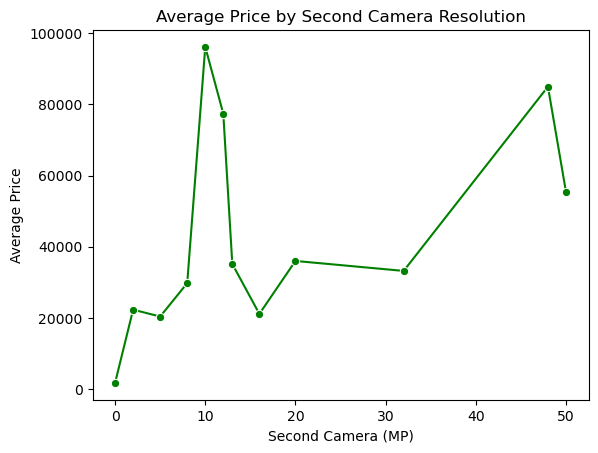

In [181]:
# Average Price by Second Camera Resolution
sns.lineplot(x=avg_price_by_second_camera.index, y=avg_price_by_second_camera.values, marker='o', color='g')
plt.title('Average Price by Second Camera Resolution')
plt.xlabel('Second Camera (MP)')
plt.ylabel('Average Price')

In [182]:
# 1. Create a cross-tabulation of RAM and Storage combinations
ram_storage_crosstab = pd.crosstab(df['RAM (GB)'], df['Storage (GB)'])
print("RAM and Storage Combinations Frequency:")
print(ram_storage_crosstab)

# 2. Calculate the average price for each RAM and Storage combination
ram_storage_avg_price = df.groupby(['RAM (GB)', 'Storage (GB)'])['Actual price(₹)'].mean().unstack().fillna(0)
print("\nAverage Price for RAM and Storage Combinations:")
print(ram_storage_avg_price)

RAM and Storage Combinations Frequency:
Storage (GB)  3.0    4.0    5.0    16.0   20.0   24.0   32.0   48.0   64.0   \
RAM (GB)                                                                      
2.0               0      0      0      0      0      0      4      0      2   
3.0               0      0      0      0      0      0      3      0     10   
4.0               7     24      2      0      0      0      2      0     62   
6.0               0      0      0      0      0      0      0      0      2   
8.0               0      0      0      2      0      0      0      0      0   
12.0              0      0      0      0      0      0      0      0      0   
16.0              0      0      0      0      0      0      0      0      0   
20.0              0      0      0      0      1      0      0      0      0   
24.0              0      0      0      0      0      0      2      0      0   
32.0              0      0      0      2      0      4     49      0      5   
48.0        

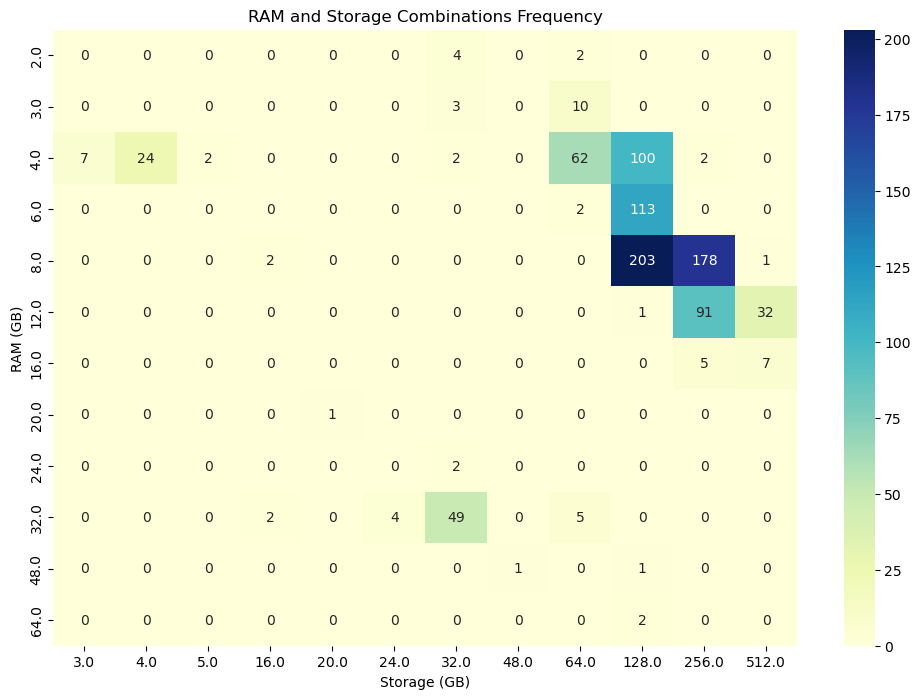

In [183]:
# Plotting the cross-tabulation as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ram_storage_crosstab, annot=True, fmt="d", cmap='YlGnBu')
plt.title('RAM and Storage Combinations Frequency')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')
plt.show()

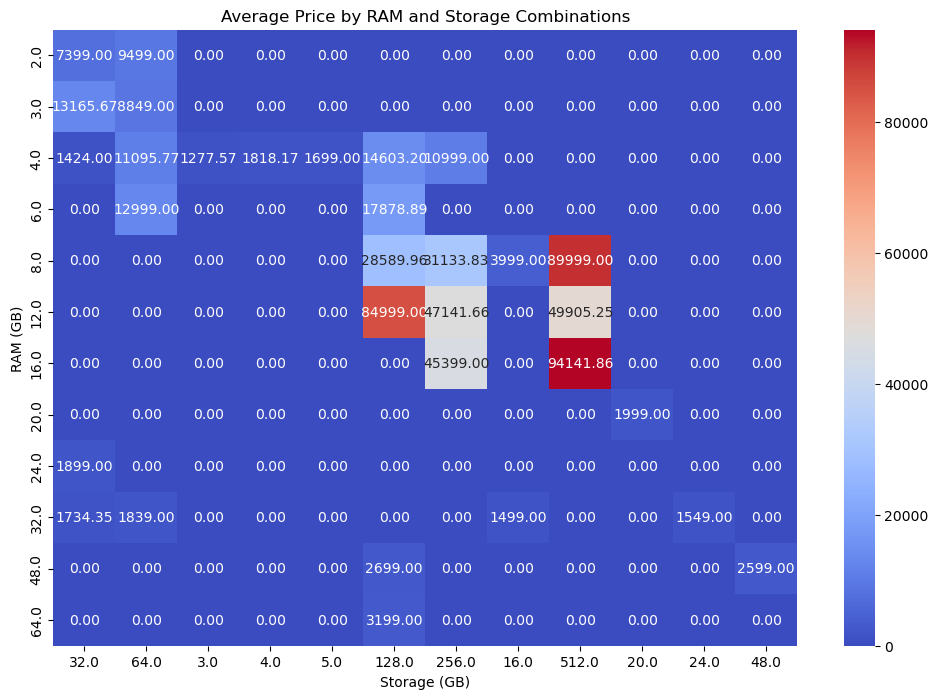

In [184]:
# Plotting the average price for each RAM and Storage combination
plt.figure(figsize=(12, 8))
sns.heatmap(ram_storage_avg_price, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Price by RAM and Storage Combinations')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')
plt.show()